In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# age : (days)
# gender(2: 'male', 1:'female')
# ap_hi[systolic blood pressure]
# ap_lo[diastolic blood pressure]
# cholesterol level[ 1: normal, 2: above normal, 3: well above normal]
# glucose level [1: normal, 2: above normal, 3: well above normal]
# smoker [0: 'No', 1:'Yes']
# alcohol_intake [0: 'No', 1:'Yes']
# physical_activity [0: 'No', 1:'Yes']
# cardiovascular_health [0:'Bad', 1:'Yes']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [6]:
features = ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

dict1 = {0: 'no', 1: 'yes'}
dict2 = {1: 'normal', 2: 'above normal', 3: 'well above normal'}
dict3 = {1: 'female', 2: 'male'}

yes_no_features = ['smoke', 'alco', 'active', 'cardio']
features2 = ['ap_hi', 'ap_lo', 'cholesterol', 'gluc']
features3 = ['gender']
features4 = ['age']

def clean_df(df):
    """Cleans the dataframe and ensures uniformity of the dataset"""

    for feature in features:
        if feature in yes_no_features:
            df[feature] = df[feature].replace(dict1)
        elif feature in features2:
            df[feature] = df[feature].replace(dict2)
        elif feature in features3:
            df[feature] = df[feature].replace(dict3)
        elif feature == 'age':
            df[feature] = (df[feature] / 365).astype(int)
        else:
            print(f'Clean data for {feature}')

    return df

In [7]:
df1 = clean_df(df)

Clean data for id
Clean data for height
Clean data for weight


In [8]:
df1.duplicated(keep=False).sum()

0

In [9]:
df1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,male,168,62.0,110,80,normal,normal,no,no,yes,no
1,1,55,female,156,85.0,140,90,well above normal,normal,no,no,yes,yes
2,2,51,female,165,64.0,130,70,well above normal,normal,no,no,no,yes
3,3,48,male,169,82.0,150,100,normal,normal,no,no,yes,yes
4,4,47,female,156,56.0,100,60,normal,normal,no,no,no,no


In [10]:
# feature reduction
df1['height_meter'] = df1['height'] / 100
df1['weight_kg'] = df1['weight'].astype(int)

# renaming features
df1 = df1.rename(columns={
    'ap_hi': 'systolic blood pressure',
    'ap_lo': 'diastolic blood pressure',
    'cholesterol': 'cholesterol level',
    'gluc': 'glucose level',
    'alco': 'alcohol intake',
    'cardio': 'cardiovascular illness'
})

In [11]:
df1.head()

,id,age,gender,height,weight,systolic blood pressure,diastolic blood pressure,cholesterol level,glucose level,smoke,alcohol intake,active,cardiovascular illness,height_meter,weight_kg
0,0,50,male,168,62.0,110,80,normal,normal,no,no,yes,no,1.68,62
1,1,55,female,156,85.0,140,90,well above normal,normal,no,no,yes,yes,1.56,85
2,2,51,female,165,64.0,130,70,well above normal,normal,no,no,no,yes,1.65,64
3,3,48,male,169,82.0,150,100,normal,normal,no,no,yes,yes,1.69,82
4,4,47,female,156,56.0,100,60,normal,normal,no,no,no,no,1.56,56


# Feature Engineering

In [13]:
df2 = df1.copy()
df2['body mass index'] = ((df2['weight_kg']) / ((df2['height_meter']) ** 2)).round().astype(int)
#df2['body mass index'] = (df2['weight_kg']/ ((df2['height_meter'])**2)).astype(int)

df2.drop(columns=['id','height','weight','height_meter','weight_kg'], inplace=True)
df2.sample(n=5)

,age,gender,systolic blood pressure,diastolic blood pressure,cholesterol level,glucose level,smoke,alcohol intake,active,cardiovascular illness,body mass index
35772,47,male,140,90,normal,normal,no,no,yes,yes,29
30537,56,female,140,90,well above normal,well above normal,no,no,yes,yes,28
26203,54,female,110,70,normal,normal,no,no,yes,no,19
13354,50,male,130,80,normal,normal,no,no,no,no,30
68140,52,female,120,80,normal,normal,no,no,yes,no,19


In [23]:
df2.duplicated(keep=False).sum()

32497

In [17]:
# Remove the string 'normal' from 'diastolic blood pressure' column
df3 = df2.copy()
df3 = df3[df3['diastolic blood pressure'] != 'normal']

# Filter diastolic blood pressure values between 50 and 140 (inclusive)
df3 = df3[(df3['diastolic blood pressure'] >= 50) & (df3['diastolic blood pressure'] <= 140)]

# Remove the string 'normal' from 'systolic blood pressure' column
df3 = df3[df3['systolic blood pressure'] != 'normal']

# Filter systolic blood pressure values between 80 and 190 (inclusive)
df3 = df3[(df3['systolic blood pressure'] >= 80) & (df3['systolic blood pressure'] <= 190)]

In [18]:
df3['systolic blood pressure'].unique()

array([110, 140, 130, 150, 100, 120, 145, 170, 135, 125, 90, 180, 160,
       133, 190, 80, 122, 169, 126, 158, 123, 161, 147, 115, 137, 153,
       148, 105, 119, 141, 165, 164, 124, 172, 162, 117, 134, 166, 176,
       116, 121, 112, 113, 118, 155, 142, 131, 157, 136, 146, 138, 159,
       109, 85, 106, 129, 93, 95, 179, 156, 168, 132, 104, 103, 175, 128,
       151, 139, 127, 108, 144, 102, 143, 107, 184, 178, 149, 167, 114,
       101, 171, 111, 188, 185, 163, 173, 154, 177, 174, 152, 96, 99, 97,
       187], dtype=object)

In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68562 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       68562 non-null  int32 
 1   gender                    68562 non-null  object
 2   systolic blood pressure   68562 non-null  object
 3   diastolic blood pressure  68562 non-null  object
 4   cholesterol level         68562 non-null  object
 5   glucose level             68562 non-null  object
 6   smoke                     68562 non-null  object
 7   alcohol intake            68562 non-null  object
 8   active                    68562 non-null  object
 9   cardiovascular illness    68562 non-null  object
 10  body mass index           68562 non-null  int32 
dtypes: int32(2), object(9)
memory usage: 5.8+ MB


In [22]:
#systolic = 90-180mmHg
#diastolic = 60-120mmHg

In [24]:
# sum of duplicated values in the DataFrame
df3.duplicated(keep=False).sum()

32471

In [25]:
df4 = df3.drop_duplicates(keep= 'first')

In [26]:
df4.duplicated(keep=False).sum()

0

In [27]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44266 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       44266 non-null  int32 
 1   gender                    44266 non-null  object
 2   systolic blood pressure   44266 non-null  object
 3   diastolic blood pressure  44266 non-null  object
 4   cholesterol level         44266 non-null  object
 5   glucose level             44266 non-null  object
 6   smoke                     44266 non-null  object
 7   alcohol intake            44266 non-null  object
 8   active                    44266 non-null  object
 9   cardiovascular illness    44266 non-null  object
 10  body mass index           44266 non-null  int32 
dtypes: int32(2), object(9)
memory usage: 3.7+ MB


In [42]:
df4['diastolic blood pressure'] = df4['diastolic blood pressure'].astype(int)
df4['systolic blood pressure'] = df4['systolic blood pressure'].astype(int)

C:\Users\HP REVOLVE\AppData\Local\Temp\ipykernel_4092\31611569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['diastolic blood pressure'] = df4['diastolic blood pressure'].astype(int)
C:\Users\HP REVOLVE\AppData\Local\Temp\ipykernel_4092\31611569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['systolic blood pressure'] = df4['systolic blood pressure'].astype(int)


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

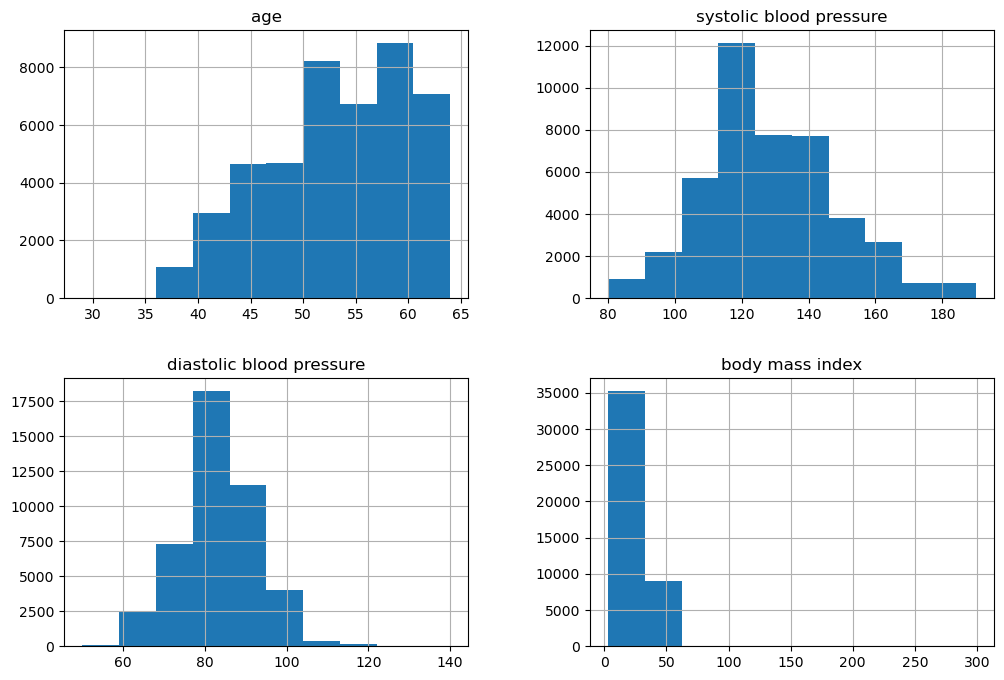

In [44]:
df4.hist(bins =10, figsize=(12,8))
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(df4, test_size=0.2, random_state=42)

In [46]:
train_set.head()

,age,gender,systolic blood pressure,diastolic blood pressure,cholesterol level,glucose level,smoke,alcohol intake,active,cardiovascular illness,body mass index
15465,43,female,110,70,normal,normal,no,no,no,no,30
58816,54,female,130,100,normal,normal,no,no,yes,yes,28
68912,50,female,150,100,above normal,above normal,no,no,yes,yes,31
68498,54,male,120,80,normal,normal,no,no,no,yes,33
32348,56,female,130,90,normal,normal,no,no,no,yes,23


In [47]:
#train_set.head()
X = train_set.drop(columns=['cardiovascular illness'])
y = train_set['cardiovascular illness'].copy()

In [48]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

numerical_features = ['age', 'body mass index','systolic blood pressure', 'diastolic blood pressure']
categorical_features = ['gender', 'cholesterol level','glucose level', 'smoke', 'alcohol intake', 'active']

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, numerical_features),
    ("cat", cat_pipeline, categorical_features),
])

In [49]:
# correlation
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35412 entries, 15465 to 20699
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       35412 non-null  int32 
 1   gender                    35412 non-null  object
 2   systolic blood pressure   35412 non-null  int32 
 3   diastolic blood pressure  35412 non-null  int32 
 4   cholesterol level         35412 non-null  object
 5   glucose level             35412 non-null  object
 6   smoke                     35412 non-null  object
 7   alcohol intake            35412 non-null  object
 8   active                    35412 non-null  object
 9   body mass index           35412 non-null  int32 
dtypes: int32(4), object(6)
memory usage: 2.4+ MB


In [50]:
# df4['systolic blood pressure'].value_counts()
# X.info()

In [51]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [52]:
X_prepared = preprocessing.fit_transform(X)

In [53]:
X_prepared

array([[-1.47003384, -1.03458237, -1.13663481, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.13550995,  0.05460549,  1.67323289, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44832415,  1.14379335,  1.67323289, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.15721964,  1.68838728,  1.67323289, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.71934406, -1.5791763 , -1.13663481, ...,  0.        ,
         1.        ,  0.        ],
       [-0.44832415,  0.59919942,  0.73661032, ...,  0.        ,
         0.        ,  1.        ]])

In [54]:
# X

In [55]:
# X['active'].unique()

In [60]:
#X_prepared_fr = pd.DataFrame(
    #X_prepared,
    #columns=preprocessing.get_feature_names_out(),
    #index=X.index)
#X_prepared_fr.head(2)

In [61]:
from sklearn.linear_model import LogisticRegression
log_clf = make_pipeline(preprocessing, LogisticRegression())
log_clf.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018D578011F0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                          

In [62]:
train_predictions = log_clf.predict(X)
train_predictions

array(['no', 'yes', 'yes', ..., 'yes', 'no', 'yes'], dtype=object)

In [63]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y, train_predictions))

              precision    recall  f1-score   support

          no       0.68      0.64      0.66     15478
         yes       0.73      0.76      0.75     19934

    accuracy                           0.71     35412
   macro avg       0.70      0.70      0.70     35412
weighted avg       0.71      0.71      0.71     35412



In [64]:
# test_set.info()

In [65]:
X_test = test_set.drop('cardiovascular illness', axis=1)
y_test = test_set['cardiovascular illness'].copy()

In [66]:
test_predictions1 = log_clf.predict(X_test)

In [67]:
print(classification_report(y_test, test_predictions1))

              precision    recall  f1-score   support

          no       0.68      0.63      0.66      3920
         yes       0.72      0.76      0.74      4934

    accuracy                           0.70      8854
   macro avg       0.70      0.70      0.70      8854
weighted avg       0.70      0.70      0.70      8854



In [68]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = make_pipeline(preprocessing, RandomForestClassifier(n_estimators=1_000))
rf_clf.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018D578011F0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                          

In [69]:
test_predictions = rf_clf.predict(X_test)

print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

          no       0.56      0.52      0.54      3920
         yes       0.64      0.67      0.66      4934

    accuracy                           0.61      8854
   macro avg       0.60      0.60      0.60      8854
weighted avg       0.60      0.61      0.60      8854



In [70]:
dict2 = {'no':0, 'yes':1}
test_set['cardiovascular illness'] = test_set['cardiovascular illness'].replace(dict2)

In [71]:
X_test = test_set.drop(columns = ['cardiovascular illness'])
y_test = test_set['cardiovascular illness'].copy()

In [72]:
#y_test

In [73]:
dict2 = {'no':0, 'yes':1}
train_set['cardiovascular illness'] = train_set['cardiovascular illness'].replace(dict2)
# train_set.head()

In [74]:
X_train = train_set.drop(columns=['cardiovascular illness'])
y_train = train_set['cardiovascular illness'].copy()

In [75]:
from xgboost import XGBClassifier

xgb_clf = make_pipeline(preprocessing, XGBClassifier())
xgb_clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018D578011F0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                 

In [76]:
test_predictions3 = xgb_clf.predict(X_test)

print(classification_report(y_test, test_predictions3))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66      3920
           1       0.73      0.74      0.74      4934

    accuracy                           0.70      8854
   macro avg       0.70      0.70      0.70      8854
weighted avg       0.70      0.70      0.70      8854

